In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,RepeatVector
from tensorflow.keras import Sequential

In [3]:
from google.colab import files
file = files.upload()

Saving ambient_temperature_system_failure.csv to ambient_temperature_system_failure (1).csv


In [4]:
df = pd.read_csv("ambient_temperature_system_failure.csv")
df.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


<Axes: >

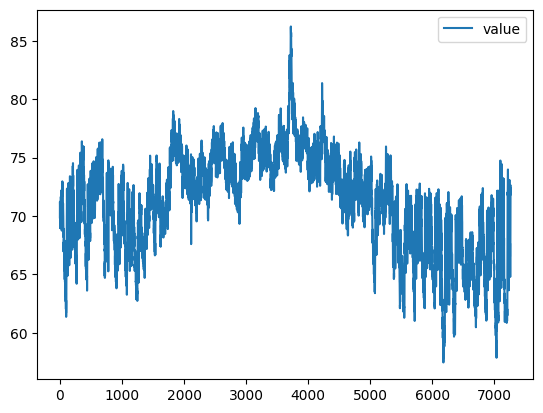

In [5]:
df.plot()

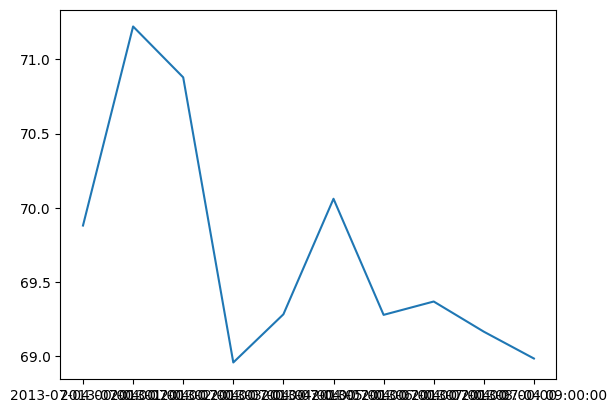

In [6]:
plt.plot(df["timestamp"][:10],df["value"][:10])

In [7]:
scaler = MinMaxScaler()
df["timestamp"]=pd.to_datetime(df["timestamp"])
df["value"]=scaler.fit_transform(np.array(df["value"]).reshape(-1,1))
df.head()

,timestamp,value
0,2013-07-04 00:00:00,0.431862
1,2013-07-04 01:00:00,0.478426
2,2013-07-04 02:00:00,0.466521
3,2013-07-04 03:00:00,0.399829
4,2013-07-04 04:00:00,0.411098


## input sequences

In [8]:
data = df["value"].values
time_steps = 24

def create_sequences(data,time_steps):
  X=[]
  for i in range(len(data)-time_steps):
    X.append(data[i:(i+time_steps)])
  return np.array(X)

X_sequences = create_sequences(data,time_steps)
print(X_sequences[:10])
print(X_sequences.shape)

[[0.43186209 0.47842565 0.46652145 0.39982866 0.41109768 0.43812427
  0.41096605 0.41408944 0.40703587 0.40075628 0.43479022 0.45534076
  0.44669514 0.4445657  0.43096075 0.49313335 0.4793098  0.46190799
  0.48374713 0.49843357 0.50871888 0.48999705 0.5120594  0.45860039]
 [0.47842565 0.46652145 0.39982866 0.41109768 0.43812427 0.41096605
  0.41408944 0.40703587 0.40075628 0.43479022 0.45534076 0.44669514
  0.4445657  0.43096075 0.49313335 0.4793098  0.46190799 0.48374713
  0.49843357 0.50871888 0.48999705 0.5120594  0.45860039 0.48268485]
 [0.46652145 0.39982866 0.41109768 0.43812427 0.41096605 0.41408944
  0.40703587 0.40075628 0.43479022 0.45534076 0.44669514 0.4445657
  0.43096075 0.49313335 0.4793098  0.46190799 0.48374713 0.49843357
  0.50871888 0.48999705 0.5120594  0.45860039 0.48268485 0.49116695]
 [0.39982866 0.41109768 0.43812427 0.41096605 0.41408944 0.40703587
  0.40075628 0.43479022 0.45534076 0.44669514 0.4445657  0.43096075
  0.49313335 0.4793098  0.46190799 0.48374713 

In [9]:
X_sequences = X_sequences.reshape((X_sequences.shape[0], X_sequences.shape[1],1))
print(X_sequences.shape)

(7243, 24, 1)


In [10]:
print(X_sequences[:10])

[[[0.43186209]
  [0.47842565]
  [0.46652145]
  [0.39982866]
  [0.41109768]
  [0.43812427]
  [0.41096605]
  [0.41408944]
  [0.40703587]
  [0.40075628]
  [0.43479022]
  [0.45534076]
  [0.44669514]
  [0.4445657 ]
  [0.43096075]
  [0.49313335]
  [0.4793098 ]
  [0.46190799]
  [0.48374713]
  [0.49843357]
  [0.50871888]
  [0.48999705]
  [0.5120594 ]
  [0.45860039]]

 [[0.47842565]
  [0.46652145]
  [0.39982866]
  [0.41109768]
  [0.43812427]
  [0.41096605]
  [0.41408944]
  [0.40703587]
  [0.40075628]
  [0.43479022]
  [0.45534076]
  [0.44669514]
  [0.4445657 ]
  [0.43096075]
  [0.49313335]
  [0.4793098 ]
  [0.46190799]
  [0.48374713]
  [0.49843357]
  [0.50871888]
  [0.48999705]
  [0.5120594 ]
  [0.45860039]
  [0.48268485]]

 [[0.46652145]
  [0.39982866]
  [0.41109768]
  [0.43812427]
  [0.41096605]
  [0.41408944]
  [0.40703587]
  [0.40075628]
  [0.43479022]
  [0.45534076]
  [0.44669514]
  [0.4445657 ]
  [0.43096075]
  [0.49313335]
  [0.4793098 ]
  [0.46190799]
  [0.48374713]
  [0.49843357]
  [0.5

In [27]:
input_dim = 1
model = Sequential([LSTM(64,activation = 'relu',input_shape=(time_steps,input_dim)),
                    RepeatVector(time_steps),
                    LSTM(64, activation='relu',return_sequences=True)])
model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(LSTM(16,activation='relu',return_sequences=True))
model.add(LSTM(1,activation='relu',return_sequences=True))
model.compile(optimizer='adam',loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 24, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 24, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 24, 16)         │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 24, 1)          │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,544 (256.03 KB)

 Trainable params: 65,544 (256.03 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(X_sequences,X_sequences,
                    epochs=50,batch_size=32,
                    validation_split=0.1,shuffle = False)

Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0025 - val_loss: 0.0064
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.0025 - val_loss: 0.0062
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - loss: 0.0025 - val_loss: 0.0058
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.0022 - val_loss: 0.0048
Epoch 9/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 10/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0019 - val_loss: 0.0044
Epoch 11/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 12/50
204/204 ━━━━━━━━━━

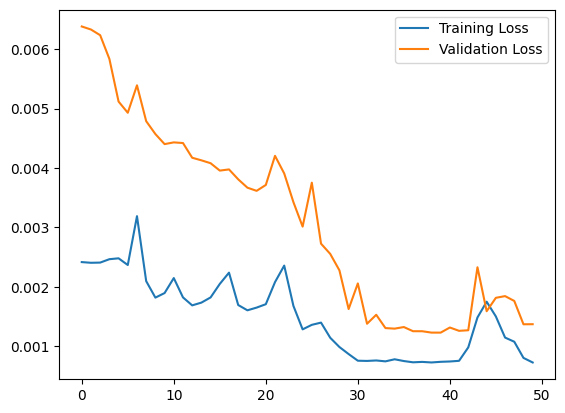

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [37]:
# 1. Predict
X_pred = model.predict(X_sequences)

# 2. Compute sequence-wise MSE
mse = np.mean(np.power(X_sequences - X_pred, 2), axis=(1, 2))

# 3. Threshold
threshold = np.mean(mse) + 3 * np.std(mse)
anomalies = mse > threshold

print("Shape of MSE:", mse.shape)
print("Number of anomalies:", np.sum(anomalies))

227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Shape of MSE: (7243,)
Number of anomalies: 143


In [38]:
anomaly_df = pd.DataFrame({
    'timestamp': df['timestamp'][time_steps:].reset_index(drop=True),
    'value': df['value'][time_steps:].reset_index(drop=True),
    'reconstruction_error': mse,
    'is_anomaly': anomalies
})

anomaly_df.head()

,timestamp,value,reconstruction_error,is_anomaly
0,2013-07-05 00:00:00,0.482685,0.000479,False
1,2013-07-05 01:00:00,0.491167,0.000480,False
2,2013-07-05 02:00:00,0.469970,0.000422,False
3,2013-07-05 03:00:00,0.444483,0.000343,False
4,2013-07-05 04:00:00,0.451052,0.000314,False


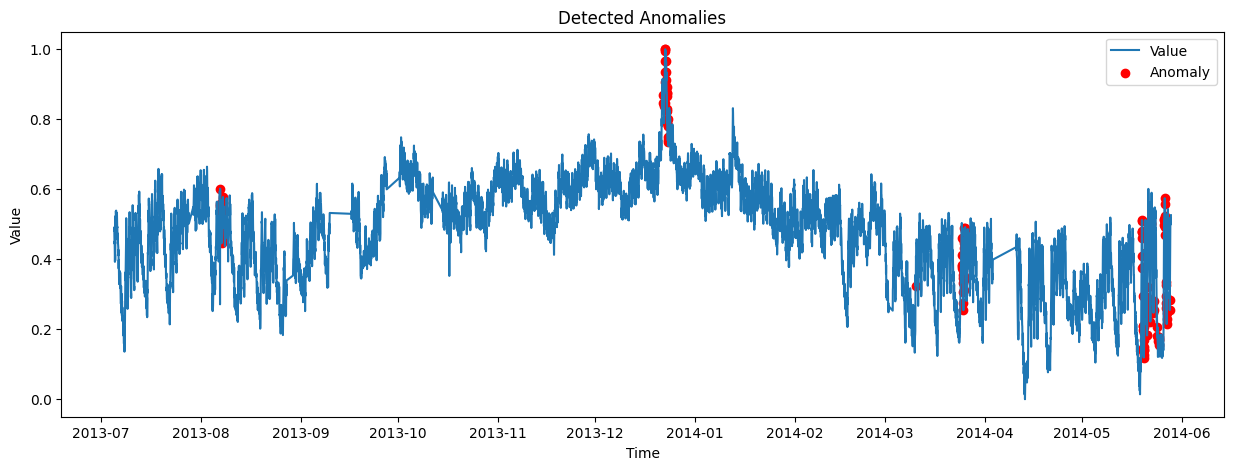

In [39]:
plt.figure(figsize=(15,5))
plt.plot(anomaly_df['timestamp'], anomaly_df['value'], label='Value')
plt.scatter(anomaly_df[anomaly_df['is_anomaly']]['timestamp'],
            anomaly_df[anomaly_df['is_anomaly']]['value'],
            color='r', label='Anomaly')
plt.title('Detected Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()